In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

Now train to 209 epoch!
Max_top1 =  84.43, epoch=163


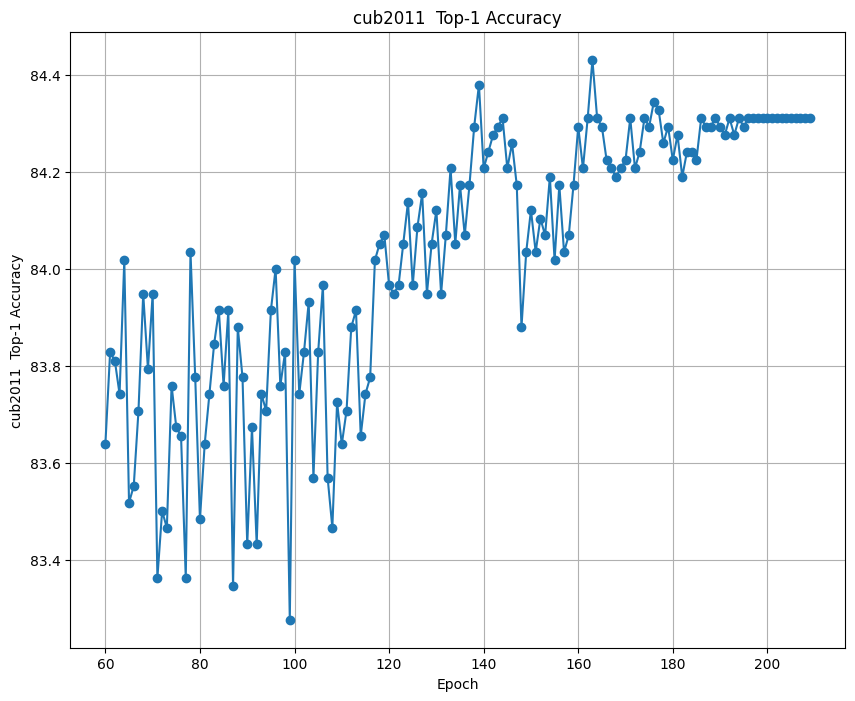

In [3]:
# 读取CSV文件，跳过开头的行数
data='/data/hjy/SSF/vit_base_patch16_224_in21k/fgvc/cub2011/ssf/20230820-022856-vit_base_patch16_224_in21k-224/summary.csv'
data='/data/hjy/SSF/vit_base_patch16_224_in21k/fgvc/nabirds/ssf/20230819-210240-vit_base_patch16_224_in21k-224/summary.csv'
data='/data/hjy/SSF/vit_base_patch16_224_in21k/fgvc/stanford_cars/ssf/20230820-222547-vit_base_patch16_224_in21k-224/summary.csv'
data='/data/hjy/SSF/vit_base_patch16_224_in21k/fgvc/cub2011/pruning_retrain_lora/20230826-045708-vit_base_patch16_224_in21k-224/summary.csv'
match = re.search(r'\/fgvc\/([^\/]+)\/', data )
if match:
    nabirds_part = match.group(1)
    name=nabirds_part
else:
    name=None
skip_rows = 2
S=60#None
E=None
data = pd.read_csv(data, skiprows=skip_rows)
# 选择epoch和eval_top1列
epochs = data['epoch']        #pandas.core.series.Series
eval_top1 = data['eval_top1']
# 选择最大值
print(f'Now train to {max(epochs):3} epoch!')
print(f'Max_top1 = {max(eval_top1.tolist()):6.2f}, epoch={epochs[eval_top1.idxmax()]:3}')
epochs=epochs[S:E]
eval_top1 = eval_top1[S:E]
# 绘制图形
plt.figure(figsize=(10, 8))
plt.plot(epochs, eval_top1, marker='o')
plt.xlabel('Epoch')
name+='  Top-1 Accuracy'
plt.ylabel(name)
plt.title(name)
plt.grid(True)
plt.show()
